https://blog.daum.net/geoscience/1617

파싱: 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것을 의미

In [1]:
!pip install requests #Python HTTP 라이브러리
!pip install beautifulsoup4 #Beautiful Soup는 HTML과 XML 문서 파싱을 위한 파이썬 패키지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Request를 통해 네이버 뉴스에서 '범죄도시2'을 검색한 결과를 호출

In [12]:
import requests
r = requests.get('https://search.naver.com/search.naver?sm=tab_sug.top&where=news&query=%EB%B2%94%EC%A3%84%EB%8F%84%EC%8B%9C2&oquery=%EA%B5%AD%EB%A6%BD%EA%B3%B5%EC%9B%90&tqi=hojNBwp0J1sssMdfh30ssssstDh-113857&acq=%EB%B2%94%EC%A3%84%EB%8F%84%EC%8B%9C&acr=1&qdt=0')
html_doc = r.text


위에서 정의한 html_doc을 Beautiful Soup를 통해 열기

In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')


[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"><i class="spnew ico_keyboard">한글 입력기</i></a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew ico_arrow">자동완성 레이어</i></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" href="https://help.naver.com/support/alias/search/word/
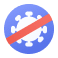
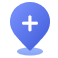
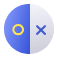
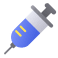

In [4]:
soup.find_all('a') #find_all 함수를 사용하면, <a> 태그를 모두 검색

In [5]:
for link in soup.find_all('a'): #<a> 태그의 href 속성(링크된 페이지의 URL 명시)을 출력하는 구문
    print(link.get('href'))

#lnb
#content
https://www.naver.com
#
#
#
#
#
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/alias/search/word/word_29.naver
#
#
#
#
@5@
#
#
#
#
#
#
#
https://help.naver.com/support/alias/search/word/word_16.naver
#
https://help.naver.com/support/alias/search/word/word_16.naver
https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fsm%3Dtab_sug.top%26where%3Dnews%26query%3D%25EB%25B2%2594%25EC%25A3%2584%25EB%258F%2584%25EC%258B%259C2%26oquery%3D%25EA%25B5%25AD%25EB%25A6%25BD%25EA%25B3%25B5%25EC%259B%2590%26tqi%3DhojNBwp0J1sssMdfh30ssssstDh-113857%26acq%3D%25EB%25B2%2594%25EC%25A3%2584%25EB%258F%2584%25EC%258B%259C%26acr%3D1%26qdt%3D0
https://help.naver.com/support/alias/search/word/word_16.naver
#
https://help.naver.com/support/alias/search/word/word_17.naver
https://help.naver.com/support/alias/search/word/word_18.naver
#
?where=nexearch&sm=ta

뉴스 제목(title)만을 출력하고 싶다면
* 크롬 브라우저에서 제목을 우클릭한 후 '검사'버튼을 클릭
* a 태그에 class = "news_tit" 속성을 확인"


In [6]:
news_tit = soup.findAll("a", {"class":"news_tit"})
print(news_tit)

[<a class="news_tit" href="https://www.nocutnews.co.kr/news/5774805" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000112_000000000000000003655944&amp;g=079.0003655944&amp;u='+urlencode(this.href));" target="_blank" title="'범죄도시 2', '부산행' 뛰어넘고 역대 韓 영화 15위">'<mark>범죄도시 2</mark>', '부산행' 뛰어넘고 역대 韓 영화 15위</a>, <a class="news_tit" href="http://star.mk.co.kr/new/view.php?mc=ST&amp;year=2022&amp;no=546562" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=880000BC_000000000000000004981332&amp;g=009.0004981332&amp;u='+urlencode(this.href));" target="_blank" title="'범죄도시3' 빌런 이준혁 벌크업...마동석과 맞장 준비 중">'<mark>범죄도시</mark>3' 빌런 이준혁 벌크업...마동석과 맞장 준비 중</a>, <a class="news_tit" href="http://biz.heraldcorp.com/view.php?ud=202206211259434355286_1" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=9&amp;i=88000110_000000000000000003567450&amp;g=112.0003567450&amp;u='+urlencode(this.href));" target="_blank" title="'범죄도시2'·'우블' 박지환 &quot;또 다른 감각 느끼도록 해야 장면 살아나&quot;[화보]">'<mark>범죄도시

In [7]:
news_tit[0]

<a class="news_tit" href="https://www.nocutnews.co.kr/news/5774805" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=88000112_000000000000000003655944&amp;g=079.0003655944&amp;u='+urlencode(this.href));" target="_blank" title="'범죄도시 2', '부산행' 뛰어넘고 역대 韓 영화 15위">'<mark>범죄도시 2</mark>', '부산행' 뛰어넘고 역대 韓 영화 15위</a>

In [8]:
news_tit[0].get('href')

'https://www.nocutnews.co.kr/news/5774805'

In [9]:
news_tit[0].get('title')

"'범죄도시 2', '부산행' 뛰어넘고 역대 韓 영화 15위"

In [10]:
len(news_tit)

10

In [11]:
for i in range(len(news_tit)): #반복문을 통해 기사 제목만을 호출
    print(news_tit[i].get('title'))

'범죄도시 2', '부산행' 뛰어넘고 역대 韓 영화 15위
'범죄도시3' 빌런 이준혁 벌크업...마동석과 맞장 준비 중
'범죄도시2'·'우블' 박지환 "또 다른 감각 느끼도록 해야 장면 살아나"[화보]
‘마녀2’·‘범죄도시2’ 보고 싶은데…주말 영화 1만5000원?
정재광, '범죄도시2'→'구필수는 없다' 영화 드라마 오가는 눈부신 활약
‘범죄도시2’, ‘부산행’ 뛰어넘었다...역대 흥행 순위 15위 [SS무비
‘범죄도시2’ 전진오, 전천후 멀티맨 대활약 빛났다
'마녀 2', 168만↑ 1위…역대 19위 '부산행' 꺾은 '범죄도시2' [Nbox]
마동석 넘는 마동석…'범죄도시2' 오늘(21일) '부산행' 기록 깬다
‘탑건: 매버릭’ 사전예매량, ‘범죄도시2’ 넘었다
